In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack
%matplotlib inline

In [2]:
# Number of samplepoints
N = 800
# sample spacing
T = 1.0 / N

x = np.linspace(0.0, N*T, N)

In [3]:
def plot_fft(y):
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

In [4]:
def plot(y):
    x = np.linspace(0.0, N*T, N)
    plt.plot(x, y)

In [5]:
def plot_both(y):
    fig, axes = plt.subplots(2, figsize=(12, 8))
    
    x = np.linspace(0.0, N*T, N)
    axes[0].plot(x, y)
    
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    axes[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))

In [12]:
def low_pass_filter(y):
    return y[1:] + y[:-1]

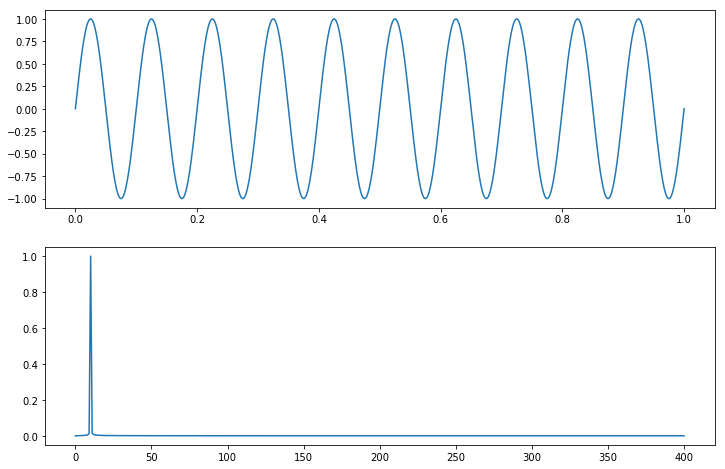

In [13]:
x = np.linspace(0.0, N*T, N)
y = np.sin(10.0 * 2.0*np.pi*x)
plot_both(y)

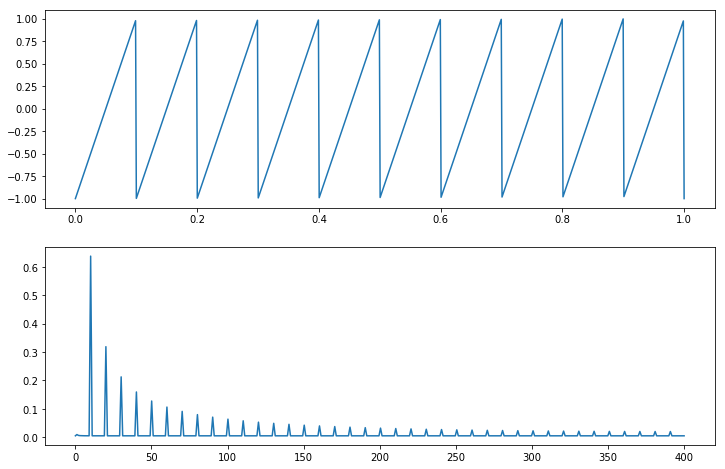

In [14]:
x = np.linspace(0.0, N*T, N)
y = signal.sawtooth(10.0 * 2.0*np.pi*x)
plot_both(y)

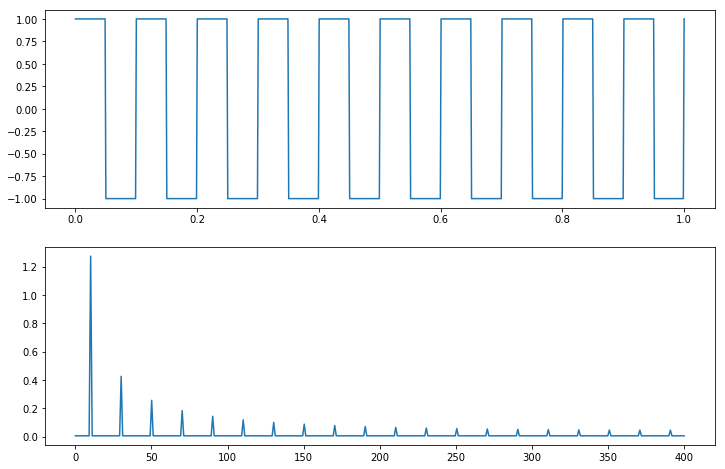

In [15]:
x = np.linspace(0.0, N*T, N)
y = signal.square(10.0 * 2.0*np.pi*x)
plot_both(y)

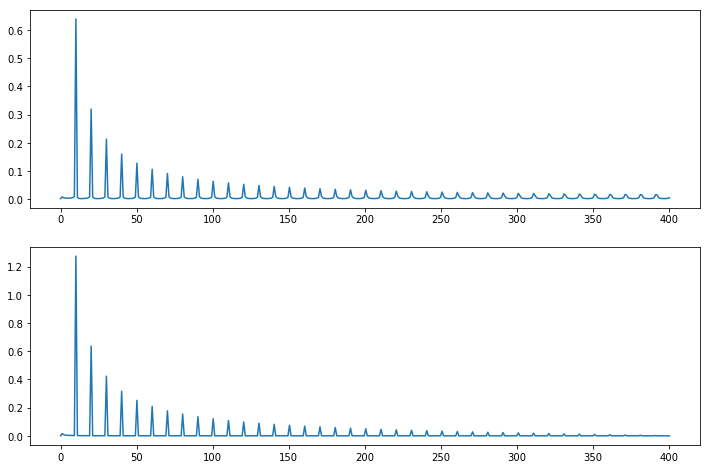

In [18]:
x = np.linspace(0.0, (N+1)*T, N+1)
y = signal.sawtooth(10.0 * 2.0*np.pi*x)
yFilter = low_pass_filter(y)
fig, axes = plt.subplots(2, figsize=(12, 8))

yf = fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
axes[0].plot(xf, 2.0/N * np.abs(yf[:N//2]))

yf = fftpack.fft(yFilter)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
axes[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))

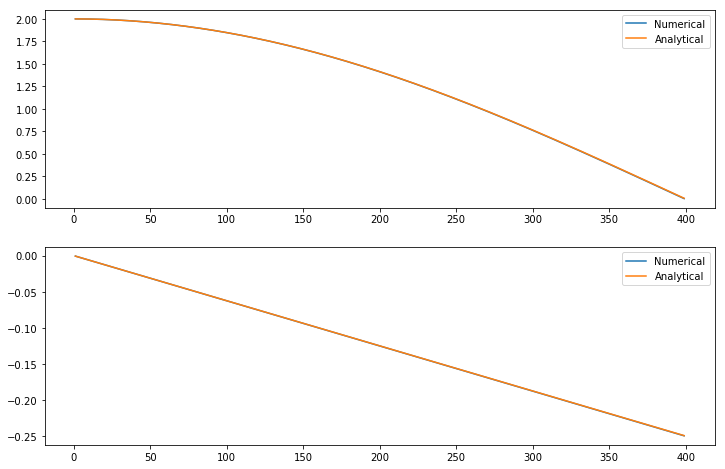

In [50]:
def max_amplitude(freq):
    x = np.linspace(0.0, (N+1)*T, N+1)
    y = np.exp(freq*2.0*np.pi*1j*x)
    return np.absolute(low_pass_filter(y)).max()

def angle(freq):
    x = np.linspace(0.0, (N+1)*T, N+1)
    y = np.exp(freq*2.0*np.pi*1j*x)
    return np.mean(np.angle(y[:-1]*np.conj(low_pass_filter(y))))/(2.0*np.pi)

freqs = np.arange(1, 400)
ampout = [max_amplitude(f) for f in freqs]
angles = [angle(f) for f in freqs]
fig, axes = plt.subplots(2, figsize=(12, 8))
axes[0].plot(freqs, ampout, label="Numerical")
axes[0].plot(freqs, 2*np.cos(freqs/float(N)*np.pi), label="Analytical")
axes[1].plot(freqs, angles, label="Numerical")
axes[1].plot(freqs, -freqs/(2.*N), label="Analytical")
axes[0].legend()
axes[1].legend()
plt.show()

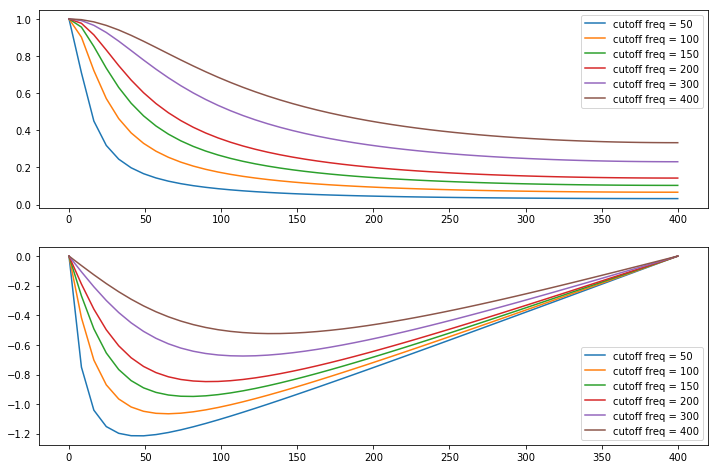

In [77]:
def response(freqs, alpha):
    z = np.exp(2*np.pi*1j*freqs*T)
    return alpha/(1-(1-alpha)/z)

fig, axes = plt.subplots(2, figsize=(12, 8))
for cutoff in [50, 100, 150, 200, 300, 400]:
    freqs = np.linspace(0, N/2)
    resp = response(freqs, cutoff*T)
    axes[0].plot(freqs, np.absolute(resp), label='cutoff freq = ' + str(cutoff))
    axes[1].plot(freqs, np.angle(resp), label='cutoff freq = ' + str(cutoff))

axes[0].legend()
axes[1].legend()
plt.show()